# Predictive Maintenance Use Case

Due to the large size of the other notebook, and the big amount of RAM memory required for LIME / SHAP, we will proceed with the evaluation of those in this new notebook. Thus, we must import all important and necessary components (models, dataframes, etc.) first to continue working with them in this notebook.

# Overview

- [Data Import](#Data-Import)
<p>
- [Data Preparation](#Data-Preparation)
    - [Sampled Train DF for SHAP](#Sampled-Train-DF-for-SHAP)
<p>
- [XGB Model [SKLearn_API]](#XGB-Model-[SKLearn_API])
    - [XGB Model [Original_API]](#XGB-Model-[Original_API])
        - [XGB Model Evaluation](#XGB-Model-Evaluation)<p>
    - [XGB: LIME](#XGB:-LIME)
        - [XGB: Calculation of all Feature Importances](#XGB:-Calculation-of-all-Feature-Importances)<p>
    - [XGB: SHAP](#XGB:-SHAP)
        - [XGB: Calculation of all Shapley Values](#XGB:-Calculation-of-all-Shapley-Values)<p>
<p>
- [MLP Model](#MLP-Model)
    - [MLP: LIME](#MLP:-LIME)
        - [MLP: Calculation of all Feature Importances](#MLP:-Calculation-of-all-Feature-Importances)<p>
    - [MLP: SHAP](#MLP:-SHAP)
        - [MLP: Calculation of all Shapley Values](#MLP:-Calculation-of-all-Shapley-Values)<p>

In [1]:
#Import packages & Setup
import numpy as np #Linear Algebra
import pandas as pd #Data Frames / Analysis / Structuring / Import
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting and using inline to not always repeat plt.show() statement
np.set_printoptions(suppress = True) #Suppress scientifc notation
%matplotlib inline

## Data Import
[[Back to the top]](#Overview)

In [2]:
import pickle

#Specifying the file paths
train_df_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\train_df.sav'
train_df_csv_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\train_df.csv'

test_df_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\test_df.sav'
test_df_csv_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\test_df.csv'

#Importing the data
train_df = pickle.load(open(train_df_fname, 'rb'))
#train_df.to_csv(train_df_csv_fname, sep=',', encoding='utf-8') #Export as CSV for Azure ML

test_df = pickle.load(open(test_df_fname, 'rb'))
#test_df.to_csv(test_df_csv_fname, sep=',', encoding='utf-8') #Export as CSV for Azure ML

In [3]:
train_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,...,pressure_std_24h,vibration_std_24h,error1_sum_24h,error2_sum_24h,error3_sum_24h,error4_sum_24h,error5_sum_24h,model,age,failure
0,2015-01-03 04:00:00,1,194.942847,418.842271,95.896312,47.163648,170.653496,454.514860,100.850710,39.306509,...,11.337811,5.678391,0.0,0.0,0.0,0.0,0.0,3,18,0
1,2015-01-03 05:00:00,1,174.138401,489.250315,91.926306,32.323616,170.356866,454.242875,100.787669,38.471831,...,11.384920,5.121860,0.0,0.0,0.0,0.0,0.0,3,18,0
2,2015-01-03 06:00:00,1,177.594089,459.956670,96.651624,52.997327,169.533156,454.785072,100.050567,39.449734,...,11.036546,5.561553,0.0,0.0,0.0,0.0,0.0,3,18,0
3,2015-01-03 07:00:00,1,175.213280,486.494804,104.432962,47.875804,169.700339,459.028774,100.094720,39.953035,...,11.052525,5.759618,1.0,0.0,0.0,0.0,0.0,3,18,0
4,2015-01-03 08:00:00,1,164.341435,568.972310,94.488533,49.023585,169.859196,462.466826,100.409064,40.204330,...,10.765817,6.023521,1.0,0.0,0.0,0.0,0.0,3,18,0


In [4]:
test_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,...,pressure_std_24h,vibration_std_24h,error1_sum_24h,error2_sum_24h,error3_sum_24h,error4_sum_24h,error5_sum_24h,model,age,failure
0,2015-01-03 04:00:00,76,159.077858,463.268115,99.836651,44.177068,175.946148,437.867975,99.109422,41.889142,...,10.680956,4.100460,0.0,0.0,0.0,0.0,0.0,2,10,0
1,2015-01-03 05:00:00,76,168.874939,422.430444,90.680505,42.960636,176.669220,440.562034,98.798174,41.690672,...,10.818075,3.916935,0.0,0.0,0.0,0.0,0.0,2,10,0
2,2015-01-03 06:00:00,76,161.841489,423.787001,108.519650,44.913357,175.283501,438.809223,99.634476,41.645535,...,10.758840,3.871132,0.0,0.0,0.0,0.0,0.0,2,10,0
3,2015-01-03 07:00:00,76,180.679989,397.144210,109.666342,43.701090,175.607685,437.265839,100.141980,42.054792,...,10.938867,3.517384,0.0,0.0,0.0,0.0,0.0,2,10,0
4,2015-01-03 08:00:00,76,174.403680,502.389812,112.473193,39.961410,174.684470,439.194517,100.064502,42.193895,...,10.840127,3.355517,0.0,0.0,0.0,0.0,0.0,2,10,0


## Data Preparation
[[Back to the top]](#Overview)

Due to the enormous power needed to compute both - LIME feature importances and also more critically, shapley values, we will in the following sample our test_df to the size of only 2.5% of the original test_df.

In the following, we will prepare the data and show, that the newly sampled df mostly corresponds to the original test_df in terms of label and feature distributions (in relative terms obviously).

In [5]:
import math

#Defining the portion to sample of the test_df (we will use 2,5% of the whole test_df)
sample_percentage = 0.025

#Saving the original label distribution of the test_df in a variable
label_distribution = test_df['failure'].value_counts(normalize = False)

#Multiplying each label with the sample_percentage to obtain the final adjusted frequency needed and using ceil
failure_0 = math.ceil(label_distribution[0] * sample_percentage)
failure_1 = math.ceil(label_distribution[1] * sample_percentage)
failure_2 = math.ceil(label_distribution[2] * sample_percentage)
failure_3 = math.ceil(label_distribution[3] * sample_percentage)
failure_4 = math.ceil(label_distribution[4] * sample_percentage)

#Printing the new absolute distribution and the total length of the total length
print(failure_0, failure_1, failure_2, failure_3, failure_4)
print(failure_0 + failure_1 + failure_2 + failure_3 + failure_4)

5332 27 41 29 27
5456


In [6]:
#Creating the new sampled_test_df
sampled_test_df = pd.DataFrame()

#Sampling the needed amount of rows of each sub-dataframe
sampled_test_df = sampled_test_df.append(test_df[test_df['failure'] == 0].sample(n = failure_0, random_state = 777))
sampled_test_df = sampled_test_df.append(test_df[test_df['failure'] == 1].sample(n = failure_1, random_state = 777))
sampled_test_df = sampled_test_df.append(test_df[test_df['failure'] == 2].sample(n = failure_2, random_state = 777))
sampled_test_df = sampled_test_df.append(test_df[test_df['failure'] == 3].sample(n = failure_3, random_state = 777))
sampled_test_df = sampled_test_df.append(test_df[test_df['failure'] == 4].sample(n = failure_4, random_state = 777))

#Resorting the new DF by machineID and datetime 
sampled_test_df = sampled_test_df.sort_values(by = ['machineID', 'datetime'])

#Resetting the Index & Saving the index numbers of chosen rows
sampled_test_df_index = sampled_test_df.index
sampled_test_df.reset_index(inplace = True, drop = True)

sampled_test_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,...,pressure_std_24h,vibration_std_24h,error1_sum_24h,error2_sum_24h,error3_sum_24h,error4_sum_24h,error5_sum_24h,model,age,failure
0,2015-01-04 02:00:00,76,155.814481,407.510723,103.585001,49.497730,160.754741,445.540769,98.720573,40.803403,...,8.645176,6.984816,0.0,0.0,0.0,0.0,0.0,2,10,0
1,2015-01-04 08:00:00,76,158.979361,440.687515,90.810568,32.050086,160.584657,445.315406,97.521896,39.817238,...,8.204315,7.405118,0.0,0.0,0.0,0.0,0.0,2,10,0
2,2015-01-04 12:00:00,76,164.144088,508.937598,81.407381,44.689157,162.315141,454.356336,97.521860,41.668684,...,8.510131,6.157496,0.0,0.0,0.0,0.0,0.0,2,10,0
3,2015-01-05 21:00:00,76,174.471495,441.128548,92.717511,35.924900,174.614070,439.916015,97.951118,39.949455,...,10.453518,6.030565,0.0,0.0,0.0,0.0,0.0,2,10,0
4,2015-01-06 06:00:00,76,181.175525,449.692398,110.037863,45.485278,168.202237,444.149225,98.451701,39.908984,...,11.712385,5.570318,0.0,0.0,0.0,0.0,0.0,2,10,0


In [7]:
len(sampled_test_df_index)

5456

Ok brillant. Now let's make some sanity checks to see if the new sampled_test_df approximately correpsonds to the old one in terms of feature and label distributions.

In [8]:
sampled_test_df['failure'].value_counts(normalize = True)

0    0.977273
2    0.007515
3    0.005315
1    0.004949
4    0.004949
Name: failure, dtype: float64

In [9]:
test_df['failure'].value_counts(normalize = True)

0    0.977663
2    0.007372
3    0.005172
1    0.004952
4    0.004841
Name: failure, dtype: float64

In [10]:
len(sampled_test_df)

5456

In [11]:
len(test_df)

218115

In [12]:
sampled_test_df.groupby(['model', 'failure']).count().iloc[:,0:1].rename(columns = {'datetime': '#Occurences'})

#Occurences
model failure             
1     0                609
      1                  3
      2                  7
      3                  7
      4                  4
2     0               1757
      1                 11
      2                 10
      3                 22
      4                  8
3     0               1420
      1                  8
      2                  7
      4                  6
4     0               1546
      1                  5
      2                 17
      4                  9

In [13]:
test_df.groupby(['model', 'failure']).count().iloc[:,0:1].rename(columns = {'datetime': '#Occurences'})

#Occurences
model failure             
1     0              25257
      1                 96
      2                288
      3                336
      4                192
2     0              67992
      1                336
      2                384
      3                792
      4                336
3     0              60045
      1                312
      2                456
      4                192
4     0              59949
      1                336
      2                480
      4                336

In [14]:
sampled_test_df['age'].value_counts(normalize = True)

18    0.164223
14    0.160740
2     0.118035
10    0.085594
12    0.079179
17    0.075880
1     0.044905
19    0.042705
20    0.041606
6     0.040689
16    0.038490
11    0.036657
9     0.035740
5     0.035557
Name: age, dtype: float64

In [15]:
test_df['age'].value_counts(normalize = True)

18    0.160154
14    0.160154
2     0.120088
17    0.079912
12    0.079912
10    0.079912
20    0.040176
19    0.039956
16    0.039956
11    0.039956
9     0.039956
6     0.039956
5     0.039956
1     0.039956
Name: age, dtype: float64

There are some minor deviations, but we can say that the sampled_test_df is a good approximation of the entire test_df. In the sections where we calculate all explanations by LIME and SHAP, we will thus only use this sampled_test_df, to allow for an optimal computation. Moreover, as SHAP compares the object to explain to all objects in the train_df, we must also reduce the train_df in the same manner as the test_df above, which we will do in the following subtopic.

In [16]:
#Exporting the sampled_test_df for later use:
import pickle
sampled_test_df_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\sampled_test_df.sav'
#pickle.dump(sampled_test_df, open(sampled_test_df_fname, 'wb')) #Unconment to overwrite saved model

### Sampled Train DF for SHAP
[[Back to the top]](#Overview)

In [17]:
import math

#Defining the portion to sample of the test_df (we will use 2,5% of the whole test_df)
sample_number = 5500

#Saving the original label distribution of the test_df in a variable
label_distribution = train_df['failure'].value_counts(normalize = True)

#Multiplying each label with the sample_percentage to obtain the final adjusted frequency needed and using ceil
failure_0 = math.ceil(label_distribution[0] * sample_number)
failure_1 = math.ceil(label_distribution[1] * sample_number)
failure_2 = math.ceil(label_distribution[2] * sample_number)
failure_3 = math.ceil(label_distribution[3] * sample_number)
failure_4 = math.ceil(label_distribution[4] * sample_number)

#Printing the new absolute distribution and the total length of the total length
print(failure_0, failure_1, failure_2, failure_3, failure_4)
print(failure_0 + failure_1 + failure_2 + failure_3 + failure_4)

5392 28 39 17 27
5503


In [18]:
#Creating the new sampled_test_df
sampled_train_df = pd.DataFrame()

#Sampling the needed amount of rows of each sub-dataframe
sampled_train_df = sampled_train_df.append(train_df[train_df['failure'] == 0].sample(n = failure_0, random_state = 77))
sampled_train_df = sampled_train_df.append(train_df[train_df['failure'] == 1].sample(n = failure_1, random_state = 77))
sampled_train_df = sampled_train_df.append(train_df[train_df['failure'] == 2].sample(n = failure_2, random_state = 77))
sampled_train_df = sampled_train_df.append(train_df[train_df['failure'] == 3].sample(n = failure_3, random_state = 77))
sampled_train_df = sampled_train_df.append(train_df[train_df['failure'] == 4].sample(n = failure_4, random_state = 77))

#Resorting the new DF by machineID and datetime 
sampled_train_df = sampled_train_df.sort_values(by = ['machineID', 'datetime'])

#Resetting the Index
sampled_train_df.reset_index(inplace = True, drop = True)

sampled_train_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,...,pressure_std_24h,vibration_std_24h,error1_sum_24h,error2_sum_24h,error3_sum_24h,error4_sum_24h,error5_sum_24h,model,age,failure
0,2015-01-07 06:00:00,1,180.783331,421.676066,83.673324,39.450313,171.625196,441.774893,101.000854,41.917576,...,10.088542,3.985904,0.0,0.0,0.0,0.0,0.0,3,18,0
1,2015-01-08 03:00:00,1,160.001525,436.240058,94.309928,43.439983,172.246332,446.860053,97.807012,41.274008,...,10.822939,5.735017,0.0,0.0,0.0,0.0,0.0,3,18,0
2,2015-01-10 03:00:00,1,169.399976,400.770039,96.810199,39.292092,171.831534,457.979188,99.596073,38.994181,...,8.386209,4.691888,0.0,0.0,0.0,0.0,0.0,3,18,0
3,2015-01-12 21:00:00,1,165.025065,454.915929,110.241676,35.500502,172.671465,445.494707,96.981985,39.657401,...,12.644217,4.729973,0.0,0.0,0.0,0.0,0.0,3,18,0
4,2015-01-15 17:00:00,1,163.874035,552.069486,68.760655,37.276267,169.331618,470.251478,101.519367,39.085525,...,12.055214,5.500282,0.0,0.0,0.0,0.0,0.0,3,18,0


Ok brillant. Now let's make some sanity checks to see if the new sampled_train_df approximately correpsonds to the old one in terms of feature and label distributions.

In [19]:
sampled_train_df['failure'].value_counts(normalize = True)

0    0.979829
2    0.007087
1    0.005088
4    0.004906
3    0.003089
Name: failure, dtype: float64

In [20]:
train_df['failure'].value_counts(normalize = True)

0    0.980305
2    0.006932
1    0.004988
4    0.004841
3    0.002934
Name: failure, dtype: float64

## XGB Model [SKLearn_API]
[[Back to the top]](#Overview)

In [21]:
#Training Data
xgb_X_train = train_df.iloc[:,2:-1]
xgb_y_train = train_df.iloc[:,-1]

In [22]:
#Testing Data
xgb_X_test = test_df.iloc[:,2:-1]
xgb_y_test_truth = test_df.iloc[:,-1]

In [23]:
#Importing the Gradient Boosted Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing pickle to import the saved model
import pickle

#Specifying the file model path
xgb_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Models\\xgb_model.sav'

#Importing the model
loaded_xgb_model = pickle.load(open(xgb_fname, 'rb'))

In [24]:
#Predict on the xgb_X_test, using the built model from above
xgb_y_test_predicted = loaded_xgb_model.predict(xgb_X_test) #Prediction based on the saved and reloaded model
xgb_y_test_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
#Printing the Model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(xgb_y_test_truth, xgb_y_test_predicted)

0.9959929395043899

In [26]:
#Exporting XGB prediction results
xgb_class_pred_skl_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\xgb_class_pred_skl.sav'
#pickle.dump(xgb_y_test_predicted, open(xgb_class_pred_skl_fname, 'wb')) #Unconment to overwrite saved model

### XGB Model [Original_API]
[[Back to the top]](#Overview) || [[To the XGB Model Evaluation]](#XGB-Model-Evaluation) || [[Jump to XGB LIME]](#XGB:-LIME) || [[Jump to XGB SHAP]](#XGB:-SHAP)

Helpful Links:
- http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training
- http://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

To Update XGBoost follow:
- https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079

In [27]:
import xgboost as xgb #See version with: xgb.__version__ 

In [28]:
dtrain = xgb.DMatrix(xgb_X_train, xgb_y_train)
dvalid = xgb.DMatrix(xgb_X_test, xgb_y_test_truth)
watchlist = [(dtrain, "train"), (dvalid, "eval")]

In [29]:
params_1 = {
        "objective": "multi:softprob", #or "multi:softmax" for class predictions
        "num_class": 5,
        "booster" : "gbtree",
        "eval_metric": "mlogloss",
        "eta": 0.1,
        "subsample": 0.5,
        "colsample_bytree": 0.5,
        "max_depth": 3,
        "silent": 0,
        "seed": 777,
    }

In [30]:
#xgboost_model_probab_pred = xgb.train(params_1,
#                          dtrain,
#                          num_boost_round = 100, #corresponds to n_estimators
#                          evals = watchlist,
#                          verbose_eval = True
#                         )

In [31]:
#Exporting and saving / importing trained model to avoid learning multople times...
import pickle
xgboost_model_probab_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Models\\xgboost_model_probab.sav'
#pickle.dump(xgboost_model_probab_pred, open(xgboost_model_probab_fname, 'wb')) #Unconment to overwrite saved model

In [32]:
#Reload the model...
loaded_xgboost_model_probab_pred = pickle.load(open(xgboost_model_probab_fname, 'rb'))

In [33]:
y_pred_probab = loaded_xgboost_model_probab_pred.predict(dvalid)
y_pred_probab

array([[0.99960953, 0.00011295, 0.00008413, 0.00012065, 0.00007278],
       [0.999584  , 0.00012626, 0.00011177, 0.00010684, 0.00007113],
       [0.99952614, 0.00010892, 0.00011524, 0.00017215, 0.00007753],
       ...,
       [0.9995389 , 0.00019517, 0.00010338, 0.00007112, 0.00009149],
       [0.99964607, 0.00011999, 0.00010063, 0.00006571, 0.00006765],
       [0.99964726, 0.00014244, 0.00009056, 0.00006335, 0.00005633]],
      dtype=float32)

In [34]:
params_2 = {
        "objective": "multi:softmax", #or "multi:softmax" for class predictions
        "num_class": 5,
        "booster" : "gbtree",
        "eval_metric": "mlogloss",
        "eta": 0.1,
        "subsample": 0.5,
        "colsample_bytree": 0.5,
        "max_depth": 3,
        "silent": 0,
        "seed": 777,
    }

In [35]:
#xgboost_model_class_pred = xgb.train(params_2,
#                          dtrain,
#                          num_boost_round = 100, #corresponds to n_estimators
#                          evals = watchlist,
#                          verbose_eval = True
#                         )

In [36]:
#Exporting and saving / importing trained model to avoid learning multople times...
import pickle
xgboost_model_class_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Models\\xgboost_model_class.sav'
#pickle.dump(xgboost_model_class_pred, open(xgboost_model_class_fname, 'wb')) #Unconment to overwrite saved model

In [37]:
#Reload the model...
loaded_xgboost_model_class_pred = pickle.load(open(xgboost_model_class_fname, 'rb'))

In [38]:
y_pred_class = loaded_xgboost_model_class_pred.predict(dvalid)
y_pred_class

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [39]:
len(y_pred_class)

218115

In [40]:
#Exporting XGB prediction results
xgb_class_pred_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\xgb_class_pred.sav'
#pickle.dump(y_pred_class, open(xgb_class_pred_fname, 'wb')) #Unconment to overwrite saved model

#### XGB Model Evaluation
[[Back to the top]](#Overview)

In [41]:
from sklearn.metrics import confusion_matrix
from Scripts import cm_plot as cmplot #Script for printing better confusion matrix

#Defining the output classes and transforming the predicted class to series
classes = ['none', 'comp1', 'comp2', 'comp3', 'comp4']
xgb_y_test_predicted = pd.DataFrame(y_pred_class)[0]

#Calculate the confusion matrix
xgb_cm = confusion_matrix(xgb_y_test_truth, xgb_y_test_predicted)

Confusion matrix, without normalization


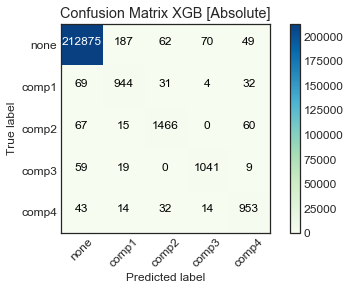

In [42]:
#Plot of the absolute Confusion Matrix on the test set
sns.set_style('white')
plt.rcParams.update({'font.size': 12})
xgb_cm_absolute = cmplot.plot_confusion_matrix(xgb_cm, classes, normalize = False, 
                                             title = 'Confusion Matrix XGB [Absolute]', cmap = plt.cm.GnBu)

Normalized confusion matrix


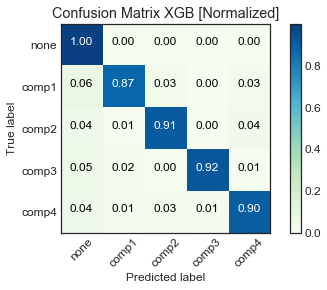

In [43]:
#Plot of the absolute Confusion Matrix on the test set
sns.set_style('white')
plt.rcParams.update({'font.size': 12})
xgb_cm_normalized = cmplot.plot_confusion_matrix(xgb_cm, classes, normalize = True, 
                                             title = 'Confusion Matrix XGB [Normalized]', cmap = plt.cm.GnBu)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(xgb_y_test_truth, xgb_y_test_predicted, target_names = classes, digits = 6))

             precision    recall  f1-score   support

       none   0.998883  0.998274  0.998579    213243
      comp1   0.800679  0.874074  0.835768      1080
      comp2   0.921433  0.911692  0.916536      1608
      comp3   0.922055  0.922872  0.922463      1128
      comp4   0.864007  0.902462  0.882816      1056

avg / total   0.996281  0.996167  0.996214    218115



In [45]:
loaded_xgboost_model_class_pred.get_fscore()

{'age': 132,
 'error1_sum_24h': 158,
 'error2_sum_24h': 113,
 'error3_sum_24h': 110,
 'error4_sum_24h': 107,
 'error5_sum_24h': 131,
 'model': 101,
 'pressure': 136,
 'pressure_mean_24h': 269,
 'pressure_std_24h': 95,
 'rotate': 139,
 'rotate_mean_24h': 242,
 'rotate_std_24h': 109,
 'vibration': 111,
 'vibration_mean_24h': 229,
 'vibration_std_24h': 112,
 'volt': 188,
 'volt_mean_24h': 250,
 'volt_std_24h': 118}

In [46]:
fscores_xgb = loaded_xgboost_model_class_pred.get_fscore()
fscores_xgb = {k.replace('_', '-'): v for k, v in fscores_xgb.items()}
fscores_xgb

{'age': 132,
 'error1-sum-24h': 158,
 'error2-sum-24h': 113,
 'error3-sum-24h': 110,
 'error4-sum-24h': 107,
 'error5-sum-24h': 131,
 'model': 101,
 'pressure': 136,
 'pressure-mean-24h': 269,
 'pressure-std-24h': 95,
 'rotate': 139,
 'rotate-mean-24h': 242,
 'rotate-std-24h': 109,
 'vibration': 111,
 'vibration-mean-24h': 229,
 'vibration-std-24h': 112,
 'volt': 188,
 'volt-mean-24h': 250,
 'volt-std-24h': 118}

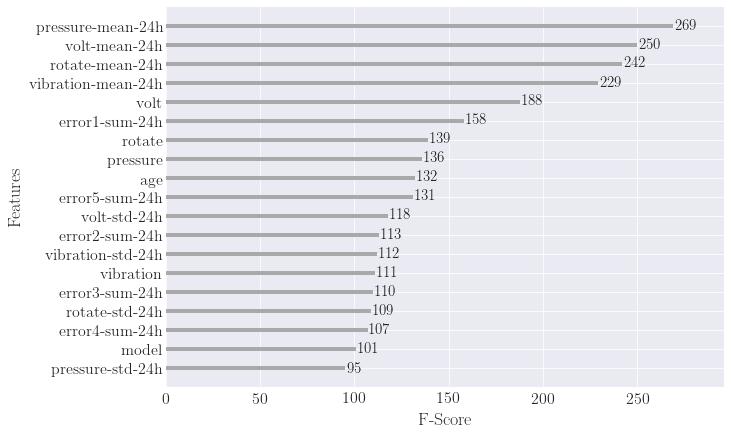

In [47]:
#Define the style of the plot
sns.set_style('darkgrid')

#Adjusting the Fonts to be able to use Latex, Note: Latex must be installed for this to work
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#Adjusting the Writing size
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1,1, figsize = (10,7))
xgb.plot_importance(fscores_xgb, ax = ax, color = 'darkgray')

#Add Axis titles
plt.title('')
plt.xlabel('F-Score', fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel('Features', fontsize = 18) # ,fontsize = 18
plt.yticks(fontsize = 16)

plt.savefig('XGB_Classification_Global_Feature_Importances.png', dpi = 200, bbox_inches = 'tight', format = 'png')

plt.show()

#Resetting Tex Formatting
plt.rc('text', usetex = False)

In [48]:
from sklearn.metrics import precision_score, recall_score

#Computation of evaluation metrics
output_labels = []
output = []

#Calculate Random Guess accuracy, precision, recall, and F1 scores
cm_row_sums = xgb_cm.sum(axis = 1) #Change CM
cm_row_dist = cm_row_sums / float(np.sum(xgb_cm)) #Change CM
rg_accuracy = np.ones(len(classes)) / float(len(classes))
rg_precision = cm_row_dist
rg_recall = np.ones(len(classes)) / float(len(classes))
rg_F1 = 2 * cm_row_dist / (len(classes) * cm_row_dist + 1)
output.extend([rg_accuracy.tolist(), rg_precision.tolist(),rg_recall.tolist(), rg_F1.tolist()])
output_labels.extend(['random guess accuracy', 'random guess precision', 'random guess recall', 'random guess F1'])

output_df = pd.DataFrame(output, columns = classes)
output_df.index = output_labels
output_df.transpose()

,random guess accuracy,random guess precision,random guess recall,random guess F1
none,0.2,0.977663,0.2,0.332069
comp1,0.2,0.004952,0.2,0.009664
comp2,0.2,0.007372,0.2,0.014220
comp3,0.2,0.005172,0.2,0.010082
comp4,0.2,0.004841,0.2,0.009454


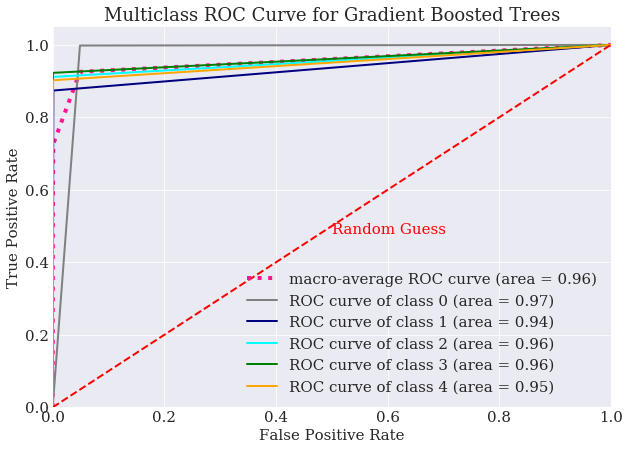

In [49]:
from Scripts import multiclass_roc as mcroc #Script for printing multiclass ROC
mcroc.plot_mc_roc(classes, xgb_y_test_truth, xgb_y_test_predicted, 'Multiclass ROC Curve for Gradient Boosted Trees')

### XGB: LIME
[[Back to the top]](#Overview) || [[To the XGB Model [Original_API]]](#XGB-Model-[Original_API])

In [50]:
#Impoprting LIME Tabular Explainer & LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder

To apply LIME, certain transformations must be performed on the data. We must e.g. tell LIME which of our feature are of a categorical nature and what values there are for the categories and so forth. These transformations are applied in the following.

In [51]:
#Creating XGB Test and Train arrays
xgb_train_lime = train_df.iloc[:,2:-1].values #sampled_train_df
xgb_test_lime = test_df.iloc[:,2:-1].values #For entire test_df use: xgb_X_test.values #sampled_test_df.iloc[:,2:-1]

#Defining Feature Names
xgb_feature_names = list(xgb_X_train.columns)

#Defining the Labels
xgb_labels = sampled_test_df['failure'].values

#Defining Class (label) Names
le = LabelEncoder()
le.fit(xgb_labels)
xgb_labels = le.transform(xgb_labels)
xgb_class_names = le.classes_

#Defining Categorical Features
xgb_categorical_features = [12,13,14,15,16,17,18] #Replacement of parts is not categorical!

#Generating all subclass names for each categorical feature
xgb_categorical_names = {}
for feature in xgb_categorical_features:
    le = LabelEncoder()
    le.fit(xgb_test_lime[:, feature])
    xgb_test_lime[:, feature] = le.transform(xgb_test_lime[:, feature])
    xgb_categorical_names[feature] = le.classes_

In [52]:
#Definition of the prediction function
xgb_predict_fn = lambda x: loaded_xgb_model.predict_proba(x).astype(float)

In [53]:
xgb_explainer = LimeTabularExplainer(xgb_train_lime,
                                     mode = 'classification', #or regression
                                     training_labels = train_df['failure'], #None, if we use discr. != entropy
                                     feature_names = xgb_feature_names,
                                     categorical_features = xgb_categorical_features,
                                     categorical_names = xgb_categorical_names,
                                     kernel_width = None, #Defaults to Sqrt(n_columns)*0,75
                                     verbose = False,
                                     class_names = xgb_class_names,
                                     feature_selection = 'auto',
                                     discretize_continuous = True,
                                     discretizer = 'entropy' #'quartile', 'decile' or 'entropy'
                                    )

In [54]:
#Set random seed for reproducibility of results
np.random.seed(777)

xgb_explanation = xgb_explainer.explain_instance(
                                                 xgb_test_lime[360], #Try 51, 143, 208, 500, 1608, 4925
                                                 xgb_predict_fn,
                                                 labels=(1,),
                                                 top_labels = 1,
                                                 num_features = 19, #Take 10 to try or 19 = #Features in Data
                                                 num_samples = 5000, #default 5000
                                                 distance_metric = 'manhattan', #to use for weighting samples
                                                 model_regressor = None
                                                )

#Note: for higher dimensions, lower k works better (i.e. manhattan distance is preferable over euclidean and os forth)
#Source: https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions

For our case, we will use the manhattan distance to determine the sample weights inside the kernel diameter. As d_manhattan >= d_euclidean, we know that further away points from the object we wish to explain loose their weight faster than when we use the euclidean distance metric. This means that objects which are closer to our object to explain are given a stronger weight. Interestingly, the manhattan distance yields better R^2 scores for classes comp1 to comp4, and worse for the "no failure" class, where the euclidean distance yields higher R^2 scores. As we wish to mainly explain or understand why a machine brakes, we will choose the manhattan distance for any further calculations.

In terms of the num_samples we use the default value of 5000. When we increase this value, our R^2 score is reduced.

The model regressor in our case is not of relevance, as it is used to select the features to show in the explanation. As we have 19 features and we ask lime to display them all, no feature selection occurs. 

The decile discretizer leads to the highest R^2 value in the minority classes (usually followed by entropy and then quartile), however, with the decile discretizer, many features are similarly weighted, which hurts the interpretation strength of the model. This is much better with the entropy discretizer, which is why we will choose this method for the following experiments. In the majority class, the quartile discretizer usually yields the highest R^2 followed by entropy and then decile.

In [55]:
xgb_explanation.available_labels() #Alternatively use .top_labels

[3]

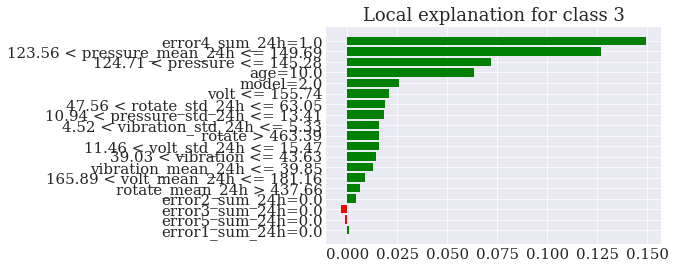

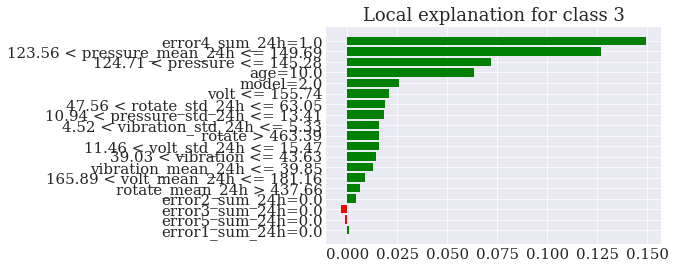

In [56]:
xgb_explanation.as_pyplot_figure(label = xgb_explanation.available_labels()[0])

In [57]:
xgb_explanation.as_map() #Alternatively use: .local_exp

{3: [(15, 0.14925677994558834),
  (6, 0.1267955545053849),
  (2, 0.07168788836193209),
  (18, 0.06347830240463073),
  (17, 0.025723025152978994),
  (0, 0.0209519749037348),
  (9, 0.01885661145289226),
  (10, 0.01826542350259185),
  (11, 0.01597758917079863),
  (1, 0.015958484195895333),
  (8, 0.01574858064969622),
  (3, 0.014195538165085526),
  (7, 0.01273444359898895),
  (4, 0.008664866891324738),
  (5, 0.006292258998860914),
  (13, 0.004201872614104467),
  (14, -0.0030515576104050385),
  (16, -0.0009589459098355291),
  (12, 0.0006719342983623786)]}

In [58]:
xgb_explanation.score #R^2 value of the returned explanation

0.4999674002432723

#### XGB: Calculation of all Feature Importances
[[Back to the top]](#Overview)

In this section, we will create a few functions necessary to <font color="red">calculate the lime feature importances for the entire sampled_test_df, with the SKLEARN XGB API</font color="red">. <b>Note: The parameters for the explainer itself, such as kernel_width = None, discretize_continuous = True and discretizer = 'entropy', have to be set above, to see changes in the results below!</b>

In [59]:
#Creation of temporary dataframe to store the results of lime feature importances
xgb_lime_feat_imp_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 'score'])

In [60]:
#Explainer function definition for Lime: Receives an index of a row and returns
#A list with feature indices and the respective feature importance
def xgb_lime_explain(object_index):
    np.random.seed(777) #To guarantee replicable results...
    xgb_explanation = xgb_explainer.explain_instance(
                                                 xgb_test_lime[object_index],
                                                 xgb_predict_fn,
                                                 labels=(1,),
                                                 top_labels = 1,
                                                 num_features = 19,
                                                 num_samples = 5000,
                                                 distance_metric = 'manhattan',
                                                 model_regressor = None
                                                )
    
    return (xgb_explanation.as_map()[xgb_explanation.available_labels()[0]],
            xgb_explanation.score)

In [61]:
#Definition of a function that writes the results from the function above into the lime_feat_imp_df
def xgb_lime_copy_to_df(object_index):
    feature_imp = xgb_lime_explain(object_index) #Call of explanation fct. to explain object of object_index
    
    for entry in feature_imp[0]:
        xgb_lime_feat_imp_df.loc[object_index, entry[0]] = entry[1] #This copies each value in the right column
        
    xgb_lime_feat_imp_df.loc[object_index, 'score'] = feature_imp[1] #This copies the score into the correct column

In [62]:
#To run the loop with a progress bar
from tqdm import tqdm

#Finally, a function to write all feature importances in the dataframe for 
for entry in tqdm(range(10)): #len(sampled_test_df) #len(test_df)
    xgb_lime_copy_to_df(entry)
    #if entry == 10: break #For testing purposes    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.41it/s]


In [63]:
#Changing the names of the columns for better understanding later
xgb_lime_feat_imp_df.columns = ['volt', 'rotate', 'pressure', 'vibration',
                            'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h', 'vibration_mean_24h',
                            'volt_std_24h', 'rotate_std_24h', 'pressure_std_24h', 'vibration_std_24h',
                            'error1_sum_24h', 'error2_sum_24h', 'error3_sum_24h', 'error4_sum_24h', 'error5_sum_24h',
                            'model', 'age', 'score']
xgb_lime_feat_imp_df.columns = [str(col) + '_lime' for col in xgb_lime_feat_imp_df.columns]

#Printing the results
xgb_lime_feat_imp_df.tail()

,volt_lime,rotate_lime,pressure_lime,vibration_lime,volt_mean_24h_lime,rotate_mean_24h_lime,pressure_mean_24h_lime,vibration_mean_24h_lime,volt_std_24h_lime,rotate_std_24h_lime,pressure_std_24h_lime,vibration_std_24h_lime,error1_sum_24h_lime,error2_sum_24h_lime,error3_sum_24h_lime,error4_sum_24h_lime,error5_sum_24h_lime,model_lime,age_lime,score_lime
5,-6.19289e-05,-0.000205458,0.000563462,-0.000402692,0.00319269,0.00227716,0.003792,0.00124739,0.000695955,0.000193368,3.73253e-05,0.000149294,0.00277139,-0.000147199,0.000385116,0.00873876,0.00590739,-0.00021797,0.000392023,0.0190633
6,-0.000162496,-7.19842e-05,-7.06534e-05,-0.000109085,0.0036046,0.00249227,0.00258824,0.000853838,0.00031715,-0.00021931,9.00151e-05,0.000355925,0.00341222,-0.000421167,0.000111811,0.00209838,0.00304876,8.15324e-05,0.000524315,0.015233
7,-0.000761434,0.000329566,-0.000330163,0.00036271,0.00577181,0.00232032,0.00434638,0.000465385,0.000485016,0.000244359,0.000136506,5.81798e-05,0.000926711,-0.000197883,-7.93192e-05,0.00171561,0.00097188,-0.000607286,0.000674826,0.0188966
8,-0.00179415,-0.00288958,-0.00103043,0.00136613,0.0127841,0.000364854,0.0112294,-0.000291464,0.00161514,-0.00110525,0.00088378,-0.000527976,0.00427493,-0.000320299,4.72801e-05,-3.57225e-05,0.00435691,-0.00180673,0.00137142,0.0388237
9,4.17786e-05,0.000240624,-0.000361616,-0.000371424,0.00499568,0.00270191,0.00335228,0.000397866,0.000294014,-0.000169468,0.000348528,4.06908e-05,0.000790916,-0.00015071,3.55681e-05,0.000226762,0.00790258,-0.000324336,0.000600171,0.0177421


In [64]:
#Appending new data to the end of the loaded_mlp_lime_results_df
#loaded_xgb_lime_feat_imp_df = loaded_xgb_lime_feat_imp_df.append(xgb_lime_feat_imp_df)
#loaded_xgb_lime_feat_imp_df

In [65]:
#Exporting and saving / importing results from above to avoid running multiple times...
import pickle
xgb_lime_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\xgb_lime_results.sav'
#pickle.dump(xgb_lime_feat_imp_df, open(xgb_lime_results_fname, 'wb')) #Unconment to overwrite saved data
#pickle.dump(loaded_xgb_lime_feat_imp_df, open(xgb_lime_results_fname, 'wb')) #Unconment to overwrite saved data

In [66]:
#Reload the Data...
loaded_xgb_lime_feat_imp_df = pickle.load(open(xgb_lime_results_fname, 'rb'))
loaded_xgb_lime_feat_imp_df.tail()

,volt_lime,rotate_lime,pressure_lime,vibration_lime,volt_mean_24h_lime,rotate_mean_24h_lime,pressure_mean_24h_lime,vibration_mean_24h_lime,volt_std_24h_lime,rotate_std_24h_lime,pressure_std_24h_lime,vibration_std_24h_lime,error1_sum_24h_lime,error2_sum_24h_lime,error3_sum_24h_lime,error4_sum_24h_lime,error5_sum_24h_lime,model_lime,age_lime,score_lime
218110,0.000138094,-0.000131486,0.000222166,-4.68703e-05,0.00332109,0.00227278,0.00149921,0.000350391,0.00011473,0.000132484,-3.67152e-05,0.000107763,0.00232416,0.000118338,0.00014637,0.000107699,0.00140778,0.000226727,-1.70139e-05,0.0171354
218111,1.42616e-05,0.00028463,-0.000201503,0.000161101,0.005466,0.00282679,0.00314352,0.000570803,-0.000218168,0.000196071,0.000114355,0.000284828,0.00489475,6.21934e-05,0.00030877,0.00128042,0.00210662,0.000391506,0.000465607,0.0184305
218112,3.0442e-05,0.00028609,-0.000165062,-0.000814292,0.00423822,0.00287774,0.0023359,0.000410791,0.000145282,0.000363206,-0.000110541,9.70287e-05,0.00161174,-0.000153456,0.000242088,0.000392761,0.00557093,0.000404315,0.000123092,0.0166899
218113,9.67454e-05,0.000108455,0.000219015,-1.92621e-05,0.00285991,0.00275967,0.00103109,0.000411761,3.23866e-05,8.49351e-05,-4.99167e-05,0.000185733,0.00143713,0.000160498,0.000120726,0.000400837,0.00224727,0.000244745,6.42253e-05,0.0190525
218114,-0.000529734,-0.000230868,-0.000424377,-0.000346011,0.00329181,0.00437612,0.00123519,0.00125523,-0.000247798,-0.000145183,-0.000158142,0.000596154,0.00150359,4.68439e-05,0.000208659,0.00235546,0.0319407,0.000582976,0.00040543,0.0427486


### XGB: SHAP
[[Back to the top]](#Overview) || [[To the XGB Model [Original_API]]](#XGB-Model-[Original_API])

In [67]:
#Impoprting shap
import shap

#Initializing javascript
shap.initjs()

#Creating XGB Test and Train arrays
xgb_train_shap = sampled_train_df.iloc[:,2:-1] #For entire train_df use: xgb_X_train
xgb_test_shap = sampled_test_df.iloc[:,2:-1] #For entire test_df use xgb_X_test

In [68]:
#Choosing a random row (object) to calculate the shapley values for
xgb_test_shap.iloc[0:1,:]

,volt,rotate,pressure,vibration,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_std_24h,rotate_std_24h,pressure_std_24h,vibration_std_24h,error1_sum_24h,error2_sum_24h,error3_sum_24h,error4_sum_24h,error5_sum_24h,model,age
0,155.814481,407.510723,103.585001,49.49773,160.754741,445.540769,98.720573,40.803403,11.48084,48.044965,8.645176,6.984816,0.0,0.0,0.0,0.0,0.0,2,10


In [69]:
#Checking the label of the class
xgb_y_test_truth[0]

0

In [70]:
#Predicting the probabilities for each class using our learnex xgb model
loaded_xgb_model.predict_proba(xgb_test_shap.iloc[0:1,:])

array([[0.99990315, 0.00002253, 0.00003034, 0.00002528, 0.0000187 ]])

In [71]:
#Object that we want to explain
object_to_shap_explain = xgb_test_shap.iloc[0:1,:] #Try 360, 710, 1430, 18223, 18570, 18578!!, 27920

#Creating the Shap explainer model
xgb_shap_explainer = shap.KernelExplainer(loaded_xgb_model.predict_proba, xgb_train_shap)

Using 5503 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [72]:
#Generating the explanation for a single object
xgb_shap_values = xgb_shap_explainer.shap_values(object_to_shap_explain)

#Printing the array of the shapley values of our highest predicted class
predicted_class = loaded_xgb_model.predict(object_to_shap_explain)[0]
print(xgb_shap_values[predicted_class])

#Plotting the results
shap.force_plot(xgb_shap_values[predicted_class], object_to_shap_explain)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [06:17<00:00, 377.72s/it]


[[0.         0.         0.         0.         0.00251886 0.00264906
  0.00166267 0.00256689 0.         0.         0.         0.00008393
  0.00224249 0.00223969 0.00230255 0.00145182 0.00231948 0.
  0.00015719 0.97970852]]


#### XGB: Calculation of all Shapley Values
[[Back to the top]](#Overview)

In this section, we will create a few functions necessary to <font color="red">calculate the shapley values for the entire test_df, using the original XGB API, which has an ultrafast implementation for calculating thousands of shapley values</font color="red">.

In [73]:
#Generating the SHAP values for all objects in the test_set
xgb_shap_values = loaded_xgboost_model_probab_pred.predict(dvalid, pred_contribs = True)
xgb_shap_values

array([[ 0.01115476,  0.00438099,  0.02871807, ..., -0.00029717,
        -0.57407176, -2.1723557 ],
       [ 0.00706798,  0.00237367,  0.02871807, ..., -0.00029717,
        -0.5823106 , -2.1723557 ],
       [ 0.01125587,  0.00237367,  0.01396318, ..., -0.00029717,
        -0.57363987, -2.1723557 ],
       ...,
       [-0.02330612,  0.00280322,  0.02470152, ..., -0.00518227,
        -0.6015074 , -2.1723557 ],
       [ 0.0087241 ,  0.00155813,  0.01718108, ..., -0.00162605,
        -0.53404045, -2.1723557 ],
       [ 0.00490692,  0.00438099,  0.02747739, ..., -0.00162605,
        -0.51080865, -2.1723557 ]], dtype=float32)

In [74]:
#Plot
shap.force_plot(xgb_shap_values[360,60:80], xgb_X_test, link = 'identity') #shap.LogitLink()

In [75]:
pd.DataFrame(xgb_shap_values)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.011155,0.004381,0.028718,0.019319,0.201198,0.121895,0.128555,0.117726,0.048782,-0.005366,...,0.008292,0.014283,0.008769,0.017634,0.003165,0.000375,-0.577652,-0.000297,-0.574072,-2.172356
1,0.007068,0.002374,0.028718,0.019319,0.202039,0.121866,0.128555,0.117670,0.049709,-0.005416,...,0.009811,0.018083,0.008622,0.017579,0.002256,0.000389,-0.574771,-0.000297,-0.582311,-2.172356
2,0.011256,0.002374,0.013963,-0.003458,0.198246,0.121866,0.129880,0.117615,0.048782,-0.005416,...,0.010419,0.018083,0.008622,0.016388,0.003165,0.000389,-0.569745,-0.000297,-0.573640,-2.172356
3,0.003249,0.001558,0.011678,0.019319,0.200766,0.121776,0.130293,0.117670,0.049934,-0.005416,...,0.009514,0.052150,0.008622,0.017597,0.002256,0.000389,-0.563780,-0.000297,-0.560907,-2.172356
4,0.004215,0.004381,0.013246,0.020471,0.200562,0.121866,0.128123,0.166883,0.049934,-0.005416,...,0.006273,0.107606,0.008769,0.017579,0.002256,0.000389,-0.534877,-0.000297,-0.552145,-2.172356
5,0.005195,0.004381,0.013969,0.022621,0.210173,0.121895,0.130688,0.110474,0.051032,-0.005416,...,0.002871,-0.008820,0.009072,0.018927,0.003161,0.000375,-0.577941,-0.000297,-0.547493,-2.172356
6,0.006710,0.001558,0.030108,0.022621,0.210095,0.121805,0.127162,0.110414,0.050806,-0.005416,...,0.000645,-0.003194,0.008256,0.018202,0.003161,0.000375,-0.580430,-0.000297,-0.507655,-2.172356
7,0.010797,0.002803,0.028724,0.022621,0.205470,0.121895,0.127162,0.110410,0.049879,-0.005366,...,0.006555,-0.005429,0.008403,0.017778,0.003161,0.000375,-0.581094,-0.000297,-0.516160,-2.172356
8,0.010797,0.001080,0.028724,0.022621,0.205437,0.121805,0.125016,0.110355,0.049879,-0.005122,...,0.000645,-0.004093,0.008136,0.017778,0.003161,0.000375,-0.566769,-0.000297,-0.505578,-2.172356
9,0.004709,0.004223,0.024363,-0.115843,0.211976,0.119199,0.120580,0.107880,0.026888,-0.002758,...,0.003711,-0.018290,0.010054,0.017013,0.003161,0.000375,-0.547490,-0.003885,-0.608940,-2.172356


The above graph output is given in Log Odd ratios and therefore a little difficult to interprete. We will thus apply the necessary transformations, to make the explanation consistent with the explanations of the shapley kernel explainer. In that explainer, the base value corresponds approximately to the relative occurence of the label in the training set and the output value corresponds to the prediction probability for that class. Thus, the distance between the base and output values are explained by the shapley coefficients. We need to bring these to the correct scale now, which is achieved in the following.

<b>Option 1: Using the relative label occurence of the labels in the training set as a base value

In [76]:
class_frequencies = train_df['failure'].value_counts(normalize = True) #Calculate the base values
class_frequencies

0    0.980305
2    0.006932
1    0.004988
4    0.004841
3    0.002934
Name: failure, dtype: float64

In [77]:
def xgb_shap_transform_scale(object_to_shap_explain):

    #Saving the predicted_class label in a variable
    predicted_class = int(y_pred_class[object_to_shap_explain])

    #Defining the base value, which corresponds to the relative occurance of that class
    base_value = class_frequencies[predicted_class]

    #Defining the output value, which corresponds to the prediction probability of that label by the prediction algo
    output_value = y_pred_probab[object_to_shap_explain][predicted_class]

    #Distance between the output_value and the base_value must be explained by the shapley values
    distance_to_explain = abs(output_value - base_value)

    #Computing the original_explanation_distance to construct the distance_coefficient later on
    if predicted_class == 0: start = 0
    if predicted_class == 1: start = 20
    if predicted_class == 2: start = 40
    if predicted_class == 3: start = 60
    if predicted_class == 4: start = 80
    end = start + 20 #There are 19 Features plus the base value, so 20 entries for each predicted class
    original_explanation_distance = sum(xgb_shap_values[object_to_shap_explain, start:end-1])

    #The distance_coefficient is the ratio between both distances which will be used later on
    distance_coefficient = original_explanation_distance / distance_to_explain

    #Getting the untransformed shapley values
    shap_array = xgb_shap_values[object_to_shap_explain, start:end]

    #Transforming the original shapley values to the new scale
    shap_array_transformed = shap_array / distance_coefficient

    #Finally resetting the base_value as it does not need to be transformed
    shap_array_transformed[19] = base_value
    
    #Now returning the transformed array
    return shap_array_transformed

In [78]:
xgb_shap_transform_scale(360)

array([ 0.00169727,  0.00131333,  0.06894047, -0.00004035,  0.0015486 ,
        0.00643717,  0.37976262,  0.0058057 , -0.00074013,  0.00203472,
       -0.02090237,  0.00295585,  0.00733668,  0.00129556,  0.00026359,
        0.36680546,  0.00218236,  0.07224724,  0.00164981,  0.00293412],
      dtype=float32)

In [79]:
#Plot
shap.force_plot(xgb_shap_transform_scale(360), xgb_X_test) #shap.LogitLink()

<b>Option 2: Using the transformed logit base value</b>
<br>Note: This transformation corresponds to the exact SHAP values for a first order taylor approximation of the logit in the transformed function (Source: https://github.com/slundberg/shap/issues/29)

In [80]:
def xgb_shap_transform_scale_logit(object_to_shap_explain):
 
    #Saving the predicted_class label in a variable
    predicted_class = int(y_pred_class[object_to_shap_explain])
    
    #Computing the original_explanation_distance to construct the distance_coefficient later on
    if predicted_class == 0: start = 0
    if predicted_class == 1: start = 20
    if predicted_class == 2: start = 40
    if predicted_class == 3: start = 60
    if predicted_class == 4: start = 80
    end = start + 20 #There are 19 Features plus the base value, so 20 entries for each predicted class
    original_explanation_distance = sum(xgb_shap_values[object_to_shap_explain, start:end-1])
    
    #Getting the untransformed shapley values
    shap_array = xgb_shap_values[object_to_shap_explain, start:end]

    #Defining the base value, which corresponds to the expit transformed base value
    from scipy.special import expit #Importing the logit function for the base value transformation
    untransformed_base_value = shap_array[19]
    base_value = expit(untransformed_base_value)

    #Defining the output value, which corresponds to the prediction probability of that label by the prediction algo
    output_value = y_pred_probab[object_to_shap_explain][predicted_class]

    #Distance between the output_value and the base_value must be explained by the shapley values
    distance_to_explain = abs(output_value - base_value)

    #The distance_coefficient is the ratio between both distances which will be used later on
    distance_coefficient = original_explanation_distance / distance_to_explain

    #Transforming the original shapley values to the new scale
    shap_array_transformed = shap_array / distance_coefficient

    #Finally resetting the base_value as it does not need to be transformed
    shap_array_transformed[19] = base_value
    
    #Now returning the transformed array
    return shap_array_transformed

In [81]:
xgb_shap_transform_scale_logit(360)

array([ 0.00154136,  0.00119269,  0.06260761, -0.00003664,  0.00140634,
        0.00584585,  0.3448777 ,  0.00527239, -0.00067214,  0.00184781,
       -0.01898229,  0.00268433,  0.00666273,  0.00117655,  0.00023938,
        0.33311078,  0.00198189,  0.06561062,  0.00149826,  0.08566247],
      dtype=float32)

In [82]:
#Plot
shap.force_plot(xgb_shap_transform_scale_logit(360), xgb_X_test) #shap.LogitLink()

In [83]:
#Creation of temporary dataframe to store the results of lime feature importances
xgb_shap_values_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [84]:
#Definition of a function that writes the results from the function above into the xgb_shap_values_df
def xgb_shap_copy_to_df(object_index):
    shap_vals = xgb_shap_transform_scale_logit(object_index) #Call of transf- fct. to explain and transform object
    
    i = 0 #Helper variable to iterate the columns of the xgb_shap_values_df
    for entry in shap_vals:
        xgb_shap_values_df.loc[object_index, i] = entry #This copies each value in the right column
        i += 1

In [85]:
#To run the loop with a progress bar
from tqdm import tqdm

#Finally, a function to write all feature importances in the dataframe for 
for entry in tqdm(range(10)): #len(test_df) -> Do this in 5000 batches
    xgb_shap_copy_to_df(entry)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 270.79it/s]


In [86]:
#Changing the names of the columns for better understanding later
xgb_shap_values_df.columns = ['volt', 'rotate', 'pressure', 'vibration',
                            'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h', 'vibration_mean_24h',
                            'volt_std_24h', 'rotate_std_24h', 'pressure_std_24h', 'vibration_std_24h',
                            'error1_sum_24h', 'error2_sum_24h', 'error3_sum_24h', 'error4_sum_24h', 'error5_sum_24h',
                            'model', 'age', 'base_value']
xgb_shap_values_df.columns = [str(col) + '_shap' for col in xgb_shap_values_df.columns]

#Printing the results
xgb_shap_values_df.tail()

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
5,6.98433e-05,5.8894e-05,0.000187782,0.000304096,0.00282537,0.00163864,0.00175685,0.00148511,0.000686027,-7.28128e-05,-5.78903e-05,-6.05794e-05,0.00215911,0.000861696,0.000756646,0.00138179,0.000795956,-0.000471173,0.000168863,0.98505
6,9.07832e-05,2.10803e-05,0.000407333,0.000306045,0.00284242,0.00164792,0.00172041,0.00149381,0.000687367,-7.32793e-05,-4.89491e-05,-1.96317e-05,0.00215289,0.000868333,0.000799931,0.00118038,0.000802236,-0.000472702,0.000160582,0.98505
7,0.000146341,3.79945e-05,0.000389317,0.000306603,0.00278491,0.00165215,0.00172355,0.00149648,0.00067606,-7.27278e-05,-4.74332e-05,4.14557e-05,0.00210794,0.000869918,0.000798063,0.00118253,0.0008037,-0.000473564,0.000170255,0.98505
8,0.000145934,1.45947e-05,0.000388234,0.000305751,0.00277672,0.00164633,0.00168974,0.00149159,0.00067418,-6.92332e-05,-2.25256e-05,4.58733e-05,0.00210208,0.000867498,0.000822016,0.00117924,0.000801304,-0.000474786,0.000168408,0.98505
9,7.27093e-05,6.52089e-05,0.000376183,-0.00178868,0.00327303,0.0018405,0.00186182,0.00166572,0.000415172,-4.25792e-05,-2.87509e-05,0.000102094,0.00265424,0.000989731,0.000860273,0.00139577,0.000997949,-0.000542382,0.000295007,0.98505


In [87]:
#Appending new data to the end of the loaded_mlp_lime_results_df
#loaded_xgb_shap_values_df = loaded_xgb_shap_values_df.append(xgb_shap_values_df)
#loaded_xgb_shap_values_df

In [88]:
#Exporting and saving / importing results from above to avoid running multiple times...
import pickle
xgb_shap_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\xgb_shap_results.sav'
#pickle.dump(loaded_xgb_shap_values_df, open(xgb_shap_results_fname, 'wb')) #Unconment to overwrite saved data

In [89]:
#Reload the Data...
loaded_xgb_shap_values_df = pickle.load(open(xgb_shap_results_fname, 'rb'))
loaded_xgb_shap_values_df.tail()

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
218110,4.32604e-05,2.27711e-05,0.000244537,-0.00140637,0.00319219,0.00181192,0.00139494,0.00142771,-0.000109133,0.000120951,2.0281e-06,0.000173377,0.00255454,0.00093798,0.000872299,0.00123446,0.000940249,0.000719276,0.000294248,0.98505
218111,-0.000118323,3.71385e-05,0.000345698,0.000299696,0.00293332,0.00166766,0.00131045,0.00129769,-9.56027e-05,0.000109788,2.51915e-06,0.000123344,0.00233363,0.000851871,0.000768283,0.000999518,0.000781478,0.000652054,0.000264005,0.98505
218112,-0.000335752,4.03837e-05,0.000355855,-0.000727591,0.00311979,0.00173869,0.00137863,0.00151067,-0.000105714,0.000110485,-7.20042e-05,0.000205075,0.00251756,0.000921683,0.000835415,0.00108685,0.000926794,0.000701835,0.000279962,0.98505
218113,0.000115161,2.05679e-05,0.000226797,0.000126975,0.00300249,0.00160456,0.00130312,0.00129225,-0.000104199,0.000128259,1.54358e-05,0.000122896,0.002222,0.000848774,0.000808939,0.00111694,0.000841623,0.000640178,0.000263045,0.98505
218114,6.42564e-05,5.73693e-05,0.000359818,0.000296224,0.00297438,0.00159468,0.0012916,0.00135682,-9.16301e-05,0.000108377,-8.44453e-05,0.000121916,0.00229373,0.000840923,0.000749571,0.00099455,0.000772475,0.0006445,0.000251884,0.98505


<b>Option 3: Exporting the data without any transformations</b>

In [90]:
xgb_shap_values.shape

(218115, 100)

In [91]:
def xgb_get_shap_values(object_to_shap_explain):
 
    #Saving the predicted_class label in a variable
    predicted_class = int(y_pred_class[object_to_shap_explain])
    
    #Selecting the shap values of the class that was predicted
    if predicted_class == 0: start = 0
    if predicted_class == 1: start = 20
    if predicted_class == 2: start = 40
    if predicted_class == 3: start = 60
    if predicted_class == 4: start = 80
    end = start + 20 #There are 19 Features plus the base value, so 20 entries for each predicted class
    
    #Getting the untransformed shapley values
    shap_array = xgb_shap_values[object_to_shap_explain, start:end]
   
    #Now returning the array
    return shap_array

In [92]:
xgb_get_shap_values(360)

array([ 0.01162159,  0.00899264,  0.47205073, -0.00027627,  0.01060358,
        0.04407672,  2.6003191 ,  0.0397529 , -0.00506782,  0.01393221,
       -0.1431232 ,  0.02023939,  0.05023585,  0.008871  ,  0.00180488,
        2.5115986 ,  0.01494313,  0.49469295,  0.01129662, -2.367785  ],
      dtype=float32)

In [93]:
#Plot
shap.force_plot(xgb_get_shap_values(360), xgb_X_test) #shap.LogitLink()

In [94]:
#Creation of temporary dataframe to store the results of lime feature importances
xgb_shap_values_untransformed_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [95]:
#Definition of a function that writes the results from the function above into the xgb_shap_values_untransformed_df
def xgb_shap_copy_to_df(object_index):
    shap_vals = xgb_get_shap_values(object_index) #Call fct. to get shap values of predicted class
    
    i = 0 #Helper variable to iterate the columns of the xgb_shap_values_df
    for entry in shap_vals:
        xgb_shap_values_untransformed_df.loc[object_index, i] = entry #This copies each value in the right column
        i += 1

In [96]:
#To run the loop with a progress bar
from tqdm import tqdm

#Finally, a function to write all feature importances in the dataframe for 
for entry in tqdm(range(0, 10)): #len(test_df) -> Do this in 5000 batches = 218116
    xgb_shap_copy_to_df(entry)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 146.26it/s]


In [97]:
#Changing the names of the columns for better understanding later
xgb_shap_values_untransformed_df.columns = ['volt', 'rotate', 'pressure', 'vibration',
                            'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h', 'vibration_mean_24h',
                            'volt_std_24h', 'rotate_std_24h', 'pressure_std_24h', 'vibration_std_24h',
                            'error1_sum_24h', 'error2_sum_24h', 'error3_sum_24h', 'error4_sum_24h', 'error5_sum_24h',
                            'model', 'age', 'base_value']
xgb_shap_values_untransformed_df.columns = [str(col) + '_shap' for col in xgb_shap_values_untransformed_df.columns]

#Printing the results
xgb_shap_values_untransformed_df.tail()

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
5,0.00519549,0.00438099,0.0139687,0.022621,0.210173,0.121895,0.130688,0.110474,0.051032,-0.00541638,-0.00430633,-0.00450637,0.160611,0.0640996,0.0562852,0.102788,0.0592094,-0.0350495,0.0125613,4.188
6,0.00671016,0.00155813,0.0301077,0.022621,0.210095,0.121805,0.127162,0.110414,0.0508061,-0.00541638,-0.00361803,-0.00145106,0.159129,0.0641821,0.0591262,0.0872466,0.0592966,-0.0349393,0.0118693,4.188
7,0.0107969,0.00280322,0.0287236,0.022621,0.20547,0.121895,0.127162,0.11041,0.0498794,-0.00536582,-0.0034996,0.00305858,0.155523,0.0641821,0.0588807,0.0872466,0.0592966,-0.0349393,0.0125613,4.188
8,0.0107969,0.00107979,0.0287236,0.022621,0.205437,0.121805,0.125016,0.110355,0.0498794,-0.00512224,-0.00166656,0.00339395,0.155523,0.0641821,0.0608171,0.0872466,0.0592847,-0.0351272,0.0124597,4.188
9,0.004709,0.00422323,0.0243633,-0.115843,0.211976,0.119199,0.12058,0.10788,0.0268885,-0.00275763,-0.00186204,0.00661208,0.171901,0.0640996,0.0557153,0.0903964,0.0646318,-0.0351272,0.0191061,4.188


In [98]:
#Appending new data to the end of the loaded_xgb_shap_values_untrans_df
#loaded_xgb_shap_values_untrans_df = loaded_xgb_shap_values_untrans_df.append(xgb_shap_values_untransformed_df)
#loaded_xgb_shap_values_untrans_df

In [99]:
#Exporting and saving / importing results from above to avoid running multiple times...
import pickle
xgb_shap_untransf_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\xgb_shap_untransf_results.sav'
#pickle.dump(xgb_shap_values_untransformed_df, open(xgb_shap_untransf_results_fname, 'wb')) #Unconment to overwrite saved data
#pickle.dump(loaded_xgb_shap_values_untrans_df, open(xgb_shap_untransf_results_fname, 'wb')) #Unconment to overwrite saved data

In [100]:
#Reload the Data...
loaded_xgb_shap_values_untrans_df = pickle.load(open(xgb_shap_untransf_results_fname, 'rb'))
loaded_xgb_shap_values_untrans_df.tail()

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
218110,0.00296013,0.00155813,0.0167326,-0.0962319,0.218428,0.123982,0.0954499,0.0976925,-0.00746755,0.0082762,0.000138774,0.0118635,0.174797,0.0641821,0.0596878,0.0844687,0.0643373,0.049217,0.0201341,4.188
218111,-0.00893104,0.00280322,0.0260933,0.022621,0.221407,0.125875,0.0989126,0.0979496,-0.0072161,0.00828678,0.000190146,0.00931004,0.176143,0.0642993,0.0579901,0.0754436,0.058986,0.049217,0.0199271,4.188
218112,-0.0233061,0.00280322,0.0247015,-0.0505055,0.216559,0.120691,0.0956973,0.104863,-0.00733811,0.00766931,-0.00499815,0.0142352,0.174756,0.0639783,0.0579901,0.0754436,0.0643331,0.0487177,0.0194335,4.188
218113,0.0087241,0.00155813,0.0171811,0.00961905,0.227455,0.121554,0.0987181,0.0978949,-0.00789365,0.00971634,0.00116934,0.00931004,0.168329,0.0642993,0.0612815,0.0846146,0.0637575,0.048497,0.0199271,4.188
218114,0.00490692,0.00438099,0.0274774,0.022621,0.227137,0.121778,0.0986326,0.103613,-0.0069973,0.0082762,-0.00644864,0.00931004,0.17516,0.0642168,0.0572408,0.0759485,0.0589898,0.049217,0.019235,4.188


## MLP Model
[[Back to the top]](#Overview)

In [101]:
#Training Data -> Note that we are using the normalized data for the ANN for training and testing created earlier
mlp_fe_not_norm_X_train = sampled_train_df.iloc[:,2:-1]
mlp_fe_not_norm_y_train = sampled_train_df.iloc[:,-1]

In [102]:
#Testing Data -> Note that we are using the normalized data for the ANN for training and testing created earlier
mlp_fe_not_norm_X_test = sampled_test_df.iloc[:,2:-1]
mlp_fe_not_norm_y_test_truth = sampled_test_df.iloc[:,-1]

In [103]:
#Importing the Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

#Importing pickle to import the saved model
import pickle

#Specifying the file model path
mlp_fe_not_norm_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Models\\mlp_fe_not_norm_model.sav'

#Importing the model
loaded_mlp_fe_not_norm_model = pickle.load(open(mlp_fe_not_norm_fname, 'rb'))

In [104]:
#Predict on the mlp_fe_X_test, using the built model from above
mlp_fe_not_norm_y_test_predicted = loaded_mlp_fe_not_norm_model.predict(mlp_fe_not_norm_X_test) #Prediction based on the saved and reloaded model
mlp_fe_not_norm_y_test_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
#Exporting MLP prediction results
mlp_class_pred_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_class_pred.sav'
#pickle.dump(mlp_fe_not_norm_y_test_predicted, open(mlp_class_pred_fname, 'wb')) #Unconment to overwrite saved model

In [106]:
#Printing the Model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(mlp_fe_not_norm_y_test_truth, mlp_fe_not_norm_y_test_predicted)

0.9957844574780058

### MLP: LIME
[[Back to the top]](#Overview)

In [107]:
#Impoprting LIME Tabular Explainer & LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder

To apply LIME, certain transformations must be performed on the data. We must e.g. tell LIME which of our feature are of a categorical nature and what values there are for the categories and so forth. These transformations are applied in the following.

In [108]:
#Creating XGB Test and Train arrays
mlp_fe_not_norm_train_lime = mlp_fe_not_norm_X_train.values
mlp_fe_not_norm_test_lime = mlp_fe_not_norm_X_test.values #For entire test_df use: mlp_fe_not_norm_X_test.values

#Defining Feature Names
mlp_fe_not_norm_feature_names = list(mlp_fe_not_norm_X_train.columns)

#Defining the Labels
mlp_fe_not_norm_labels = mlp_fe_not_norm_y_test_truth.values

#Defining Class (label) Names
le = LabelEncoder()
le.fit(mlp_fe_not_norm_labels)
mlp_fe_not_norm_labels = le.transform(mlp_fe_not_norm_labels)
mlp_fe_not_norm_class_names = le.classes_

#Defining Categorical Features
mlp_fe_not_norm_categorical_features = [12,13,14,15,16,17,18] #Replacement of parts is not categorical!

#Generating all subclass names for each categorical feature
mlp_fe_not_norm_categorical_names = {}
for feature in mlp_fe_not_norm_categorical_features:
    le = LabelEncoder()
    le.fit(mlp_fe_not_norm_test_lime[:, feature])
    mlp_fe_not_norm_test_lime[:, feature] = le.transform(mlp_fe_not_norm_test_lime[:, feature])
    mlp_fe_not_norm_categorical_names[feature] = le.classes_

#Definition of the prediction function
mlp_fe_not_norm_predict_fn = lambda x: loaded_mlp_fe_not_norm_model.predict_proba(x).astype(float)

In [109]:
mlp_fe_not_norm_explainer = LimeTabularExplainer(mlp_fe_not_norm_train_lime,
                                     mode = 'classification', #or regression
                                     training_labels = mlp_fe_not_norm_y_train, #Or None, if we use discr. != entropy
                                     feature_names = mlp_fe_not_norm_feature_names,
                                     categorical_features = mlp_fe_not_norm_categorical_features,
                                     categorical_names = mlp_fe_not_norm_categorical_names,
                                     kernel_width = None, #Defaults to Sqrt(n_columns)*0,75
                                     verbose = False,
                                     class_names = mlp_fe_not_norm_class_names,
                                     feature_selection = 'auto',
                                     discretize_continuous = True,
                                     discretizer = 'entropy' #'quartile', 'decile' or 'entropy'
                                    )

In [110]:
#Set random seed for reproducibility of results
np.random.seed(777)

mlp_fe_not_norm_explanation = mlp_fe_not_norm_explainer.explain_instance(
                                                 mlp_fe_not_norm_test_lime[162], #Try 360, 710, 1430, 18578!!, 27920
                                                 mlp_fe_not_norm_predict_fn,
                                                 labels=(1,),
                                                 top_labels = 1,
                                                 num_features = 19, #Take 10 to try or 19 = #Features in Data
                                                 num_samples = 5000, #default 5000
                                                 distance_metric = 'manhattan', #to use for weighting samples
                                                 model_regressor = None
                                                )

#Note: for higher dimensions, lower k works better (i.e. manhattan distance is preferable over euclidean and os forth)
#Source: https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions

In [111]:
mlp_fe_not_norm_explanation.available_labels() #Alternatively use .top_labels

[0]

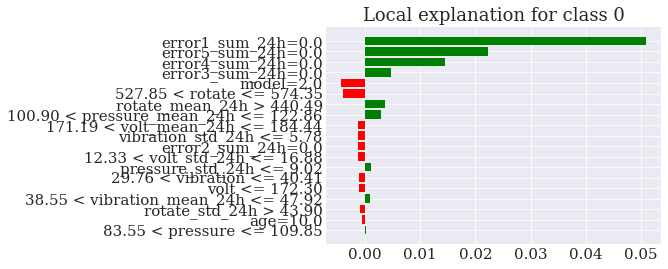

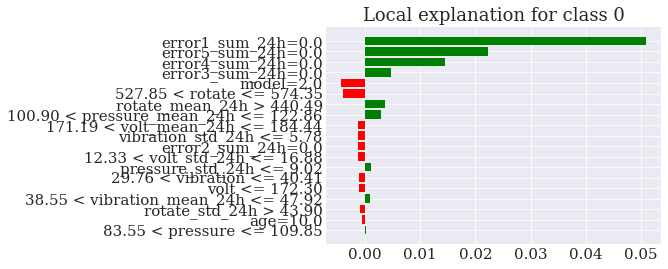

In [112]:
mlp_fe_not_norm_explanation.as_pyplot_figure(label = mlp_fe_not_norm_explanation.available_labels()[0])

In [113]:
mlp_fe_not_norm_explanation.as_map() #Alternatively use: .local_exp

{0: [(12, 0.05082101469003043),
  (16, 0.02227396046827797),
  (15, 0.014512306186714959),
  (14, 0.004806475134944063),
  (17, -0.004237206282174449),
  (1, -0.0039214879380991335),
  (5, 0.003725702139760205),
  (6, 0.0029231927075583403),
  (4, -0.001287191247757625),
  (11, -0.0012341194540407578),
  (13, -0.0011762847179507296),
  (8, -0.0011514186877530019),
  (10, 0.001130534153600396),
  (3, -0.0010678012010660281),
  (0, -0.001017915086245235),
  (7, 0.0009302818007676423),
  (9, -0.0008566910222201718),
  (18, -0.0005678336618777455),
  (2, 0.00012443619246599262)]}

In [114]:
mlp_fe_not_norm_explanation.score #R^2 value of the returned explanation

0.07909951179802399

#### MLP: Calculation of all Feature Importances
[[Back to the top]](#Overview)

In this section, we will create a few functions necessary to <font color="red">calculate the feature importances for the entire test_df, using the SKLEARN MLP API</font color="red">. <b>Note: The parameters for the explainer itself, such as kernel_width = None, discretize_continuous = True and discretizer = 'entropy', have to be set above, to see changes in the results below!</b>

In [115]:
#Creation of temporary dataframe to store the results of lime feature importances
lime_feat_imp_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 'score'])

In [116]:
#Explainer function definition for Lime: Receives an index of a row and returns
#A list with feature indices and the respective feature importance
def mlp_lime_explain(object_index):
    np.random.seed(777) #To guarantee replicable results...
    mlp_fe_not_norm_explanation = mlp_fe_not_norm_explainer.explain_instance(
                                                 mlp_fe_not_norm_test_lime[object_index],
                                                 mlp_fe_not_norm_predict_fn,
                                                 labels=(1,),
                                                 top_labels = 1,
                                                 num_features = 19,
                                                 num_samples = 5000,
                                                 distance_metric = 'manhattan',
                                                 model_regressor = None
                                                )
    return (mlp_fe_not_norm_explanation.as_map()[mlp_fe_not_norm_explanation.available_labels()[0]],
            mlp_fe_not_norm_explanation.score)

In [117]:
#Definition of a function that writes the results from the function above into the lime_feat_imp_df
def mlp_lime_copy_to_df(object_index):
    feature_imp = mlp_lime_explain(object_index) #Call of explanation fct. to explain object of object_index
    
    for entry in feature_imp[0]:
        lime_feat_imp_df.loc[object_index, entry[0]] = entry[1] #This copies each value in the right column
        
    lime_feat_imp_df.loc[object_index, 'score'] = feature_imp[1] #This copies the score into the correct column

In [118]:
#To run the loop with a progress bar
from tqdm import tqdm

#Finally, a function to write all feature importances in the dataframe for 
for entry in tqdm(range(0, 10)): #len(test_df) = 218115
    mlp_lime_copy_to_df(entry)
    #if object == 20: break #For testing purposes    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.89it/s]


In [119]:
#Changing the names of the columns for better understanding later
lime_feat_imp_df.columns = ['volt', 'rotate', 'pressure', 'vibration',
                            'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h', 'vibration_mean_24h',
                            'volt_std_24h', 'rotate_std_24h', 'pressure_std_24h', 'vibration_std_24h',
                            'error1_sum_24h', 'error2_sum_24h', 'error3_sum_24h', 'error4_sum_24h', 'error5_sum_24h',
                            'model', 'age', 'score']
lime_feat_imp_df.columns = [str(col) + '_lime' for col in lime_feat_imp_df.columns]

#Printing the results
lime_feat_imp_df.tail()

,volt_lime,rotate_lime,pressure_lime,vibration_lime,volt_mean_24h_lime,rotate_mean_24h_lime,pressure_mean_24h_lime,vibration_mean_24h_lime,volt_std_24h_lime,rotate_std_24h_lime,pressure_std_24h_lime,vibration_std_24h_lime,error1_sum_24h_lime,error2_sum_24h_lime,error3_sum_24h_lime,error4_sum_24h_lime,error5_sum_24h_lime,model_lime,age_lime,score_lime
5,-0.000458463,0.000500856,0.000724878,-0.000455954,0.00172916,0.00414924,0.00146307,0.000270388,-0.00025889,-0.000181901,0.000827235,-3.90187e-05,0.0379283,-0.00140853,0.00559097,0.0113728,0.0330223,-0.00250085,-7.20337e-05,0.0630121
6,0.000242277,-6.45968e-05,0.00180016,0.000937645,0.00133899,-0.000828777,0.001547,0.00262416,-0.00034131,-1.80415e-05,0.000572513,-1.55885e-05,0.0404643,-0.00109673,0.00969545,0.0140123,0.0338387,-0.00235497,-0.000358008,0.0802166
7,0.000250171,0.000826778,0.000370846,0.00183131,-0.000718771,0.00439868,0.00116592,0.000594855,-0.000640286,0.000761677,3.4639e-05,-0.000651722,0.0426529,-0.00110099,0.00512301,0.0175872,0.0131815,-0.000890834,-0.000727265,0.0861024
8,0.000386278,0.00126218,0.000826797,-0.000921086,-0.000799259,0.00485934,0.00281318,0.000547225,-0.000837034,0.000795994,-0.002715,-0.000249488,0.0577427,-0.0010965,0.00565591,0.0108602,0.00970581,-0.00227765,0.000866554,0.107085
9,0.00441049,-0.000627341,-0.00589618,-0.00449746,-0.00269669,-0.00686421,0.000929656,0.00548453,0.000808252,0.00073826,4.11578e-06,0.00223857,-0.0797337,-0.00468202,0.00808576,0.00167099,0.0140791,-0.00494751,-0.00303255,0.168009


In [120]:
#Trimming the DF...
#lime_feat_imp_df = lime_feat_imp_df.iloc[0:10000] #or 0:10000

In [121]:
#Exporting and saving / importing results from above to avoid running multiple times...
import pickle
mlp_lime_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_lime_results.sav'
#pickle.dump(lime_feat_imp_df, open(mlp_lime_results_fname, 'wb')) #Unconment to overwrite saved data

In [122]:
#Reload the Data...
loaded_mlp_lime_results_df = pickle.load(open(mlp_lime_results_fname, 'rb'))
loaded_mlp_lime_results_df.tail()

,volt_lime,rotate_lime,pressure_lime,vibration_lime,volt_mean_24h_lime,rotate_mean_24h_lime,pressure_mean_24h_lime,vibration_mean_24h_lime,volt_std_24h_lime,rotate_std_24h_lime,pressure_std_24h_lime,vibration_std_24h_lime,error1_sum_24h_lime,error2_sum_24h_lime,error3_sum_24h_lime,error4_sum_24h_lime,error5_sum_24h_lime,model_lime,age_lime,score_lime
5451,0.000159638,-0.000263367,0.000785333,-0.000136847,0.000925455,0.00417155,0.00136172,-0.000405771,0.000438485,-0.000110915,0.000886924,-0.000358834,0.0276509,-0.000493058,0.00346446,0.0149275,0.0200333,0.00122946,0.00173534,0.0459363
5452,0.000251938,0.000533119,0.000147139,-0.000129173,-0.000405212,0.00383994,0.00124517,-0.000167738,-0.00126394,-0.000226917,-0.00151669,-0.0015053,0.0364067,-0.000580232,0.00318719,0.0116157,0.0228794,0.00175742,0.00170703,0.0641343
5453,-0.000635736,-0.000917404,0.000233234,0.000910767,-4.5981e-05,0.00272808,0.000369338,0.000471923,-0.00133813,-0.000470944,0.000710543,0.00062424,0.0195676,-0.000180879,0.00276627,0.0135922,0.0610539,0.000530961,0.00192175,0.0635624
5454,-0.00104555,0.00103652,-0.00262615,0.00121317,0.00136778,0.00239826,0.00170932,0.00110402,-0.00105502,-0.00108441,-0.00110309,-0.000768584,0.030346,-0.000548964,0.00137742,0.0165385,0.0469299,0.00163181,0.00244554,0.0616121
5455,0.000432014,0.000254195,0.00123314,0.000146723,0.00137262,0.0041309,0.00217962,0.00123367,-0.000589988,-0.000249062,0.000913159,0.000257414,0.026418,-0.000418993,0.00371797,0.0149901,0.0389863,0.00113405,0.00198177,0.0515049


In [123]:
#Appending new data to the end of the loaded_mlp_lime_results_df
#loaded_mlp_lime_results_df = loaded_mlp_lime_results_df.append(lime_feat_imp_df)
#loaded_mlp_lime_results_df

In [124]:
#Sanity Check if everything went well...
#loaded_mlp_lime_results_df.iloc[209995:210005]

### MLP: SHAP
[[Back to the top]](#Overview)

In [125]:
#Impoprting shap
import shap

#Initializing javascript
shap.initjs()

#Creating MLP Test and Train arrays
mlp_fe_not_norm_train_shap = sampled_train_df.iloc[:,2:-1] #For entire train_df use: mlp_fe_not_norm_X_train
mlp_fe_not_norm_test_shap = sampled_test_df.iloc[:,2:-1] #For entire test_df use: mlp_fe_not_norm_X_test

In [126]:
#Choosing a random row (object) to calculate the shapley values for
mlp_fe_not_norm_test_shap.iloc[0:1,:] #Try 51, 143, 208, 500, 1608, 4925

,volt,rotate,pressure,vibration,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_std_24h,rotate_std_24h,pressure_std_24h,vibration_std_24h,error1_sum_24h,error2_sum_24h,error3_sum_24h,error4_sum_24h,error5_sum_24h,model,age
0,155.814481,407.510723,103.585001,49.49773,160.754741,445.540769,98.720573,40.803403,11.48084,48.044965,8.645176,6.984816,0.0,0.0,0.0,0.0,0.0,2,10


In [127]:
#Checking the label of the class
mlp_fe_not_norm_y_test_truth[0]

0

In [128]:
#Predicting the probabilities for each class using our learned mlp model
loaded_mlp_fe_not_norm_model.predict_proba(mlp_fe_not_norm_test_shap.iloc[0:1,:])

array([[0.99998857, 0.00000013, 0.        , 0.00000051, 0.00001079]])

In [129]:
#Object that we want to explain
object_to_shap_explain = mlp_fe_not_norm_test_shap.iloc[0:1,:] #Try 360, 710, 1430, 18223, 18570, 18578!!, 27920

#Creating the Shap explainer model
mlp_fe_not_norm_shap_explainer = shap.KernelExplainer(loaded_mlp_fe_not_norm_model.predict_proba,
                                                      mlp_fe_not_norm_train_shap)

Using 5503 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [130]:
#Generating the explanation for a single object
#mlp_fe_not_norm_shap_values = mlp_fe_not_norm_shap_explainer.shap_values(object_to_shap_explain)

#Printing the array of the shapley values of our highest predicted class
#predicted_class = loaded_mlp_fe_not_norm_model.predict(object_to_shap_explain)[0]
#print(mlp_fe_not_norm_shap_values[predicted_class])

#Plotting the results
#shap.force_plot(mlp_fe_not_norm_shap_values[predicted_class], object_to_shap_explain)

#### MLP: Calculation of all Shapley Values
[[Back to the top]](#Overview)

In this section, we will create a few functions necessary to <font color="red">calculate the Shapley Values for the entire sampled_test_df, with the SKLEARN MLP API, which takes approximately 3min to calculate the exact shapley value per object. As we have over 5K objects in the sampled_test_df, this is a rediculously time-consuming task</font color="red">.

In [131]:
#Creation of temporary dataframe to store the results of shapley values
mlp_shap_values_df = pd.DataFrame(columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [132]:
#Computing the predictions for the sample_test_df and the MLP
mlp_y_sample_predicted = loaded_mlp_fe_not_norm_model.predict(sampled_test_df.iloc[:,2:-1])

In [133]:
#Explainer function definition for SHAP: Receives an index of a row and returns
#A list with shapley values
def mlp_shap_explain(object_index):
    #Defining the object to explain
    object_to_explain = mlp_fe_not_norm_test_shap.iloc[object_index:object_index + 1,:]
    
    #Generating the explanation for the object with object_index
    mlp_fe_not_norm_shap_values = mlp_fe_not_norm_shap_explainer.shap_values(object_to_explain)
    
    #Checking the predicted class of the object to only return that explanation
    predicted_class = mlp_y_sample_predicted[object_index]
    
    return mlp_fe_not_norm_shap_values[predicted_class]

In [134]:
#Definition of a function that writes the results from the function above into the mlp_shap_values_df
def mlp_shap_copy_to_df(object_index):
    shap_values = mlp_shap_explain(object_index) #Call of explanation fct. to explain object of object_index

    i = 0 #Helper variable to iterate the columns of the mlp_shap_values_df
    for entry in shap_values[0]:
        mlp_shap_values_df.loc[object_index, i] = entry #This copies each value in the right column
        i += 1

In [135]:
#To run the loop with a progress bar
from tqdm import tqdm

#Finally, a function to write all shapley values of the sampled_test_df in the mlp_shap_values_df 
for entry in tqdm(range(0, 0)): #len(sampled_test_df)
    mlp_shap_copy_to_df(entry)

0it [00:00, ?it/s]


In [136]:
#Changing the names of the columns for better understanding later
mlp_shap_values_df.columns = ['volt', 'rotate', 'pressure', 'vibration',
                            'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h', 'vibration_mean_24h',
                            'volt_std_24h', 'rotate_std_24h', 'pressure_std_24h', 'vibration_std_24h',
                            'error1_sum_24h', 'error2_sum_24h', 'error3_sum_24h', 'error4_sum_24h', 'error5_sum_24h',
                            'model', 'age', 'base_value']
mlp_shap_values_df.columns = [str(col) + '_shap' for col in mlp_shap_values_df.columns]

#Printing the results
mlp_shap_values_df.tail()

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap


In [137]:
#Appending new data to the end of the loaded_mlp_lime_results_df
#loaded_mlp_shap_values_df = loaded_mlp_shap_values_df.append(mlp_shap_values_df)
#loaded_mlp_shap_values_df

In [138]:
#Exporting and saving / importing results from above to avoid running multiple times...
import pickle
mlp_shap_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_shap_results_0_1_5K.sav'
#pickle.dump(mlp_shap_values_df, open(mlp_shap_results_fname, 'wb')) #Unconment to overwrite saved data
#pickle.dump(loaded_mlp_shap_values_df, open(mlp_shap_results_fname, 'wb')) #Unconment to overwrite saved data

In [139]:
#Reload the Data...
loaded_mlp_shap_values_df = pickle.load(open(mlp_shap_results_fname, 'rb'))
loaded_mlp_shap_values_df.tail()

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
5451,0,0,0.000218656,0.000122006,0.00324566,0.002769,0.00215,0.00209849,0.000179107,0,0,0,0.00305922,0.00228625,0.00203654,0.00134644,0.00239089,0.000613403,0.000229403,0.977249
5452,0,0,9.65539e-05,0,0.00285624,0.00294747,0.00199121,0.00237873,0,0.000198498,0.000126356,0.000165221,0.00286784,0.00209596,0.00231704,0.00147606,0.0023655,0.000497378,0.000368455,0.977249
5453,0,0,0.000212364,0,0.00297523,0.00303467,0.00219313,0.00240459,0,0,0,0,0.00289292,0.00214518,0.00227942,0.0014156,0.00244066,0.00053454,0.00022234,0.977249
5454,5.40782e-05,0.000105651,0.000102629,0,0.00269936,0.00305642,0.00244205,0.00234762,0,0,0,0.000176442,0.00278233,0.00206684,0.00214199,0.00149724,0.00236243,0.000591913,0.000319895,0.977249
5455,6.79172e-05,0,0.000192007,0.000130607,0.00273529,0.00301339,0.00258391,0.00226911,0,0.000145053,0,0,0.00274032,0.00216715,0.00208949,0.00142388,0.00220638,0.000679512,0.000307242,0.977249


<b>Putting it all together:

In [140]:
import pickle

#File locations
mlp_shap_2K_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_shap_results_2K.sav'
mlp_shap_3K_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_shap_results_3K.sav'
mlp_shap_4K_results_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_shap_results_4K.sav'

#Importing the data
#mlp_shap_2K_results = pickle.load(open(mlp_shap_2K_results_fname, 'rb'))
#mlp_shap_3K_results = pickle.load(open(mlp_shap_3K_results_fname, 'rb'))
#mlp_shap_4K_results = pickle.load(open(mlp_shap_4K_results_fname, 'rb'))

In [141]:
#Appending the above data to the df here...
#loaded_mlp_shap_values_df = loaded_mlp_shap_values_df.append(mlp_shap_2K_results)
#loaded_mlp_shap_values_df = loaded_mlp_shap_values_df.append(mlp_shap_3K_results)
#loaded_mlp_shap_values_df = loaded_mlp_shap_values_df.append(mlp_shap_4K_results)
loaded_mlp_shap_values_df

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
0,0,0,0.000177716,0,0.00273509,0.00297645,0.00269346,0.00239387,0,0,0,0.000202077,0.00290684,0.00216184,0.00225788,0.00156551,0.00259524,0,7.40208e-05,0.977249
1,0,0,0.000256242,0,0.00282704,0.00281608,0.00271888,0.00231407,0,0,0,0.000529752,0.00300666,0.00211739,0.00213078,0.00144019,0.00259336,0,0,0.977249
2,0,0,0.000398157,0,0.00279586,0.00325393,0.00252389,0.00237559,0,0,0,0.000256991,0.00279396,0.00223717,0.00204144,0.00149798,0.00257343,0,0,0.977249
3,0,0,0.00015951,0.000164698,0.00141272,0.00222603,0.00185812,0.00225011,0,0,0,0.000255843,0.00577637,0.00229736,0.00220679,0.00145626,0.00253719,0,0,0.977249
4,0,0,0.00015716,0.000125394,0.00315852,0.00298501,0.00240716,0.00237984,0,0,0,0,0.00324384,0.00213192,0.00213948,0.00153189,0.00248256,0,0,0.977249
5,0,0,0.000262919,0,0.00283068,0.00311095,0.00280367,0.00231594,0,0,0,0.000227973,0.00282598,0.0021024,0.0022333,0.00146135,0.00247373,0,9.76956e-05,0.977249
6,0,0,0.000199847,0,0.00344009,0.00216349,0.00260892,0.00234728,0,0,0,0,0.00360632,0.00217879,0.00227283,0.00144595,0.00246683,0,0,0.977249
7,0.000237042,0,0.000204529,0,0.0023728,0.00328522,0.00221748,-0.00207741,0,0,0,0.00125979,0.00261343,0.00207721,0.00234063,0.00152544,0.00595254,0,0.000554171,0.977249
8,0.000102825,8.75572e-05,0,0.000364556,0.00256472,0.00354158,0.00253761,0.00113852,0,0,0.000419356,0.000317275,0.00262094,0.00212177,0.00214247,0.0016108,0.00287919,0,0.000290598,0.977249
9,0.00317663,0.00198879,-0.0074393,0,0.0121235,-0.00955187,-0.016616,0.0101927,-0.0112725,0,0,0,-0.0724414,0.00233184,0.00335729,0.00338409,0.0027028,-0.00701067,0,0.977249


In [142]:
#Resorting by the index
loaded_mlp_shap_values_df = pd.DataFrame.sort_index(loaded_mlp_shap_values_df)

In [143]:
#Saving and exporting the newly created dataframe
import pickle
mlp_shap_results_all_fname = 'C:\\Users\\miho\\OneDrive - EXXETA\\MA\\Code & Datasets\\Data\\mlp_shap_results_all.sav'
#pickle.dump(loaded_mlp_shap_values_df, open(mlp_shap_results_all_fname, 'wb')) #Unconment to overwrite saved data

In [144]:
#Reloading the data
loaded_mlp_shap_results_all_df = pickle.load(open(mlp_shap_results_all_fname, 'rb'))
loaded_mlp_shap_results_all_df

,volt_shap,rotate_shap,pressure_shap,vibration_shap,volt_mean_24h_shap,rotate_mean_24h_shap,pressure_mean_24h_shap,vibration_mean_24h_shap,volt_std_24h_shap,rotate_std_24h_shap,pressure_std_24h_shap,vibration_std_24h_shap,error1_sum_24h_shap,error2_sum_24h_shap,error3_sum_24h_shap,error4_sum_24h_shap,error5_sum_24h_shap,model_shap,age_shap,base_value_shap
0,0,0,0.000177716,0,0.00273509,0.00297645,0.00269346,0.00239387,0,0,0,0.000202077,0.00290684,0.00216184,0.00225788,0.00156551,0.00259524,0,7.40208e-05,0.977249
1,0,0,0.000256242,0,0.00282704,0.00281608,0.00271888,0.00231407,0,0,0,0.000529752,0.00300666,0.00211739,0.00213078,0.00144019,0.00259336,0,0,0.977249
2,0,0,0.000398157,0,0.00279586,0.00325393,0.00252389,0.00237559,0,0,0,0.000256991,0.00279396,0.00223717,0.00204144,0.00149798,0.00257343,0,0,0.977249
3,0,0,0.00015951,0.000164698,0.00141272,0.00222603,0.00185812,0.00225011,0,0,0,0.000255843,0.00577637,0.00229736,0.00220679,0.00145626,0.00253719,0,0,0.977249
4,0,0,0.00015716,0.000125394,0.00315852,0.00298501,0.00240716,0.00237984,0,0,0,0,0.00324384,0.00213192,0.00213948,0.00153189,0.00248256,0,0,0.977249
5,0,0,0.000262919,0,0.00283068,0.00311095,0.00280367,0.00231594,0,0,0,0.000227973,0.00282598,0.0021024,0.0022333,0.00146135,0.00247373,0,9.76956e-05,0.977249
6,0,0,0.000199847,0,0.00344009,0.00216349,0.00260892,0.00234728,0,0,0,0,0.00360632,0.00217879,0.00227283,0.00144595,0.00246683,0,0,0.977249
7,0.000237042,0,0.000204529,0,0.0023728,0.00328522,0.00221748,-0.00207741,0,0,0,0.00125979,0.00261343,0.00207721,0.00234063,0.00152544,0.00595254,0,0.000554171,0.977249
8,0.000102825,8.75572e-05,0,0.000364556,0.00256472,0.00354158,0.00253761,0.00113852,0,0,0.000419356,0.000317275,0.00262094,0.00212177,0.00214247,0.0016108,0.00287919,0,0.000290598,0.977249
9,0.00317663,0.00198879,-0.0074393,0,0.0121235,-0.00955187,-0.016616,0.0101927,-0.0112725,0,0,0,-0.0724414,0.00233184,0.00335729,0.00338409,0.0027028,-0.00701067,0,0.977249
